<a href="https://colab.research.google.com/github/AlexBB999/junk/blob/master/25_3_Evaluating_Clusters_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Split the data randomly into two and apply k-means using two, three and four as the number of clusters as we did in our discussion of the consistency in this checkpoint. 
Assess the consistency of the solutions using visualization. Which one does seem to be the best one?



Apply k-means on the whole dataset by setting k is equal two, three and four and get ARI score for each of them. Which model is the best?

Apply k-means on the whole dataset by setting k is equal two, three and four and get silhouette coefficient for each of them. Which model is the best?

In [0]:
import numpy as np
import pandas as pd
import scipy
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
from collections import Counter

In [0]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

In [0]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
hd0 = pd.read_sql_query('select * FROM heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [0]:
heart=hd0.copy()

In [0]:
#heart.head()

In [41]:
list(heart)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']

In [0]:
# Define the features and the outcome
X = heart.iloc[:, :13]
y = heart.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [0]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [0]:
# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In [0]:
#X_pca

In [0]:
# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=13579)

In [0]:
X_half1.shape

(151, 13)

In [0]:
X_half2.shape

(152, 13)

In [48]:
# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time we go  through the loop. 
#The tuples are the data to be used by k-means, and the PCA-derived features for graphing.
# We use k-means to fit a# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X_half1, X_pcahalf1),
    (X_half2, X_pcahalf2)]):
    print('here first')
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 3):
        print('in cluuster loop')
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

here first
in cluuster loop
here first


ValueError: ignored

In [0]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [0]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=2, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

10 loops, best of 3: 27.9 ms per loop


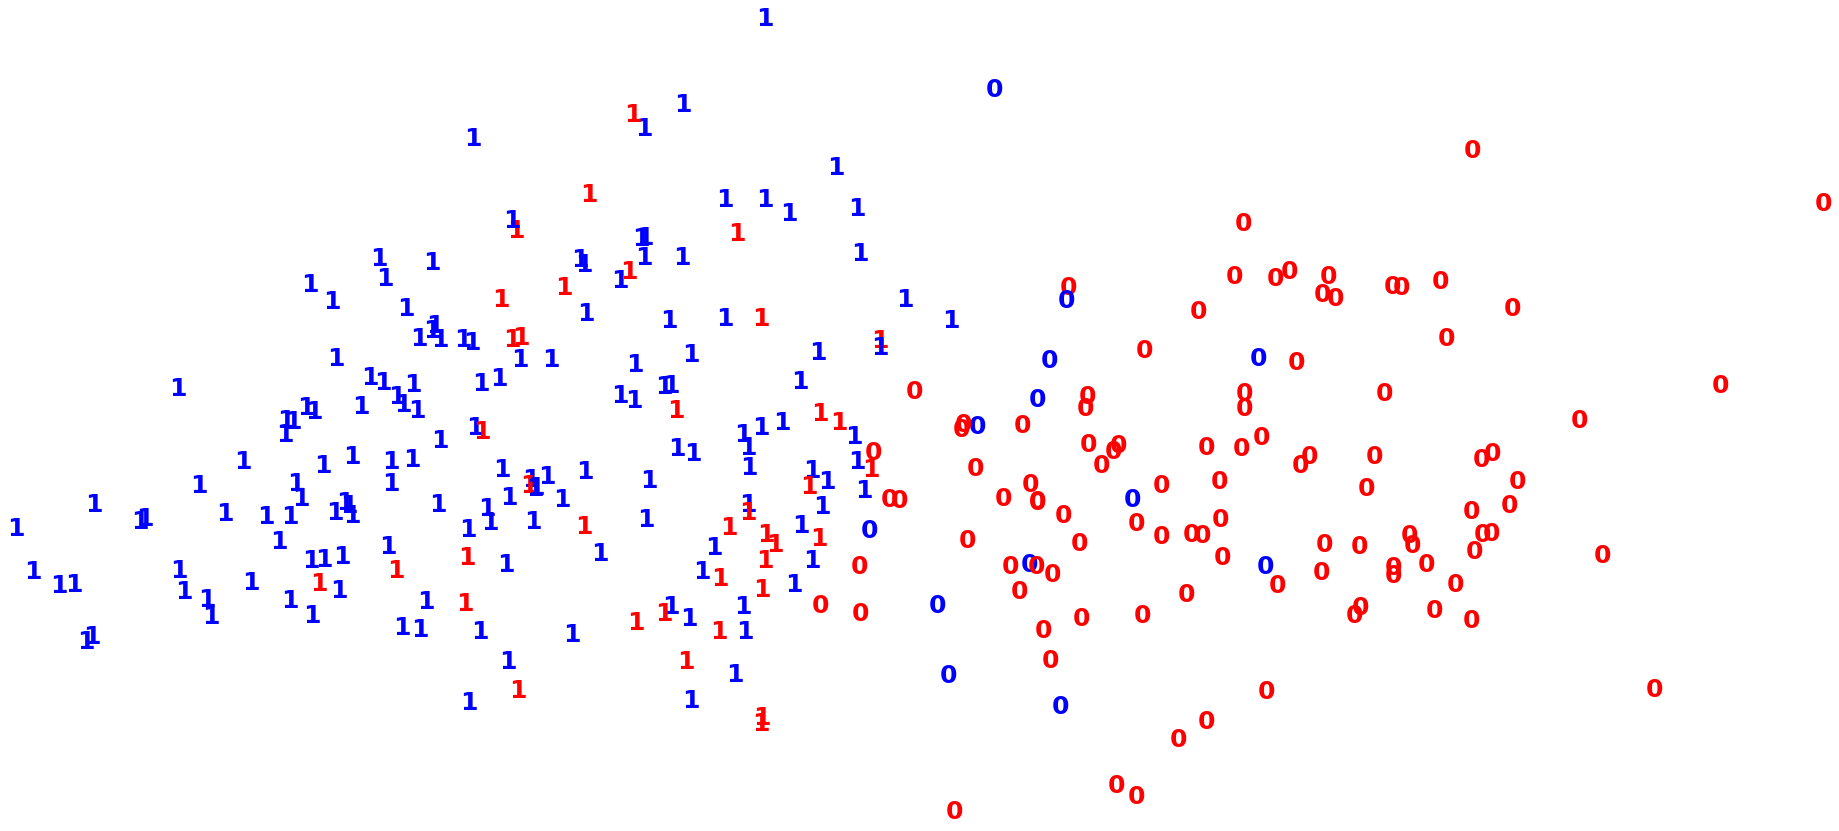

In [0]:
plt.rcParams["figure.figsize"] = [4,2]
pca = PCA(n_components=2).fit_transform(X_std)

#plt.figure(figsize=(4,2))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 25}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()